In [2]:
import numpy as np

# Datos
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])
n = len(x)

# Cálculos base
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

# Estimación de m y b (mínimos cuadrados)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# Predicciones y residuales
y_pred = m * x + b
residuals = y - y_pred

# Error cuadrático medio
mse = np.mean(residuals**2)

# Estimación de la varianza de los errores
s2 = np.sum(residuals**2) / (n - 2)

# Desviación estándar de m y b
x_mean = np.mean(x)
Sxx = np.sum((x - x_mean)**2)

sigma_m = np.sqrt(s2 / Sxx)
sigma_b = np.sqrt(s2 * (1/n + x_mean**2 / Sxx))

# Resultados
print(f"Recta estimada: y = {m:.4f}x + {b:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Desviación estándar de m: {sigma_m:.4f}")
print(f"Desviación estándar de b: {sigma_b:.4f}")


Recta estimada: y = 1.1091x + 0.3887
Error cuadrático medio (MSE): 0.2874
Desviación estándar de m: 0.1988
Desviación estándar de b: 0.7411


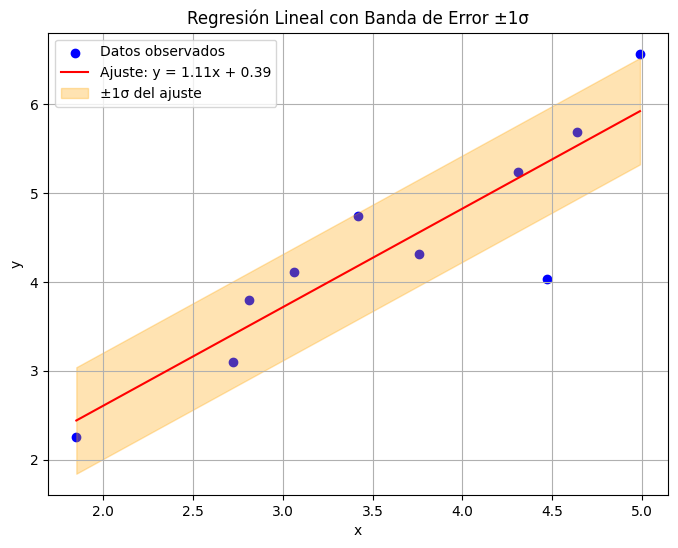

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])
n = len(x)

# Estimaciones de m y b
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# Predicción y residuales
y_pred = m * x + b
residuals = y - y_pred

# Error cuadrático medio y varianza residual
s2 = np.sum(residuals**2) / (n - 2)
sigma = np.sqrt(s2)

# Recta ajustada y bandas ±1σ
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = m * x_line + b
y_upper = y_line + sigma
y_lower = y_line - sigma

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados", color="blue")
plt.plot(x_line, y_line, label=f"Ajuste: y = {m:.2f}x + {b:.2f}", color="red")
plt.fill_between(x_line, y_lower, y_upper, color='orange', alpha=0.3, label="±1σ del ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal con Banda de Error ±1σ")
plt.legend()
plt.grid(True)
plt.show()